In [9]:
# Tratamiento de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_cus = pd.read_csv("../data/processed/customer-details_clean.xlsx")

In [56]:
df_cus.sample(4)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
14549,75242,1,2,2012-08-11,1,107f27e9-31f5-4a63-85c1-9b7e001f50f3
7713,171903,2,2,2012-08-29,10,b9184ab7-3996-4ad5-bd45-4a2f4614ac29
23111,77108,1,1,2013-11-08,32,5f46661c-00cb-4d89-81aa-b89a77db5d17
19602,33880,1,2,2012-10-08,9,8d72fafb-bf81-44ba-ae17-5c94246583d1


In [57]:
df_cus.describe(include="all")

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
count,43170.000000,43170.000000,43170.000000,43170,43170.000000,43170
unique,NaN,NaN,NaN,1096,NaN,43170
top,NaN,NaN,NaN,2012-08-10,NaN,089b39d8-e4d0-461b-87d4-814d71e0e079
freq,NaN,NaN,NaN,79,NaN,1
mean,93227.389622,1.004749,0.998633,NaN,16.591290,NaN
std,50498.181989,0.815996,0.816008,NaN,9.241769,NaN
min,5841.000000,0.000000,0.000000,NaN,1.000000,NaN
25%,49608.000000,0.000000,0.000000,NaN,9.000000,NaN
50%,93009.500000,1.000000,1.000000,NaN,17.000000,NaN
75%,136740.500000,2.000000,2.000000,NaN,25.000000,NaN


Analizamos la variable de ingresos anuales. Permite entender la capacidad económica de los clientes y detectar si hay valores extremos/outliers

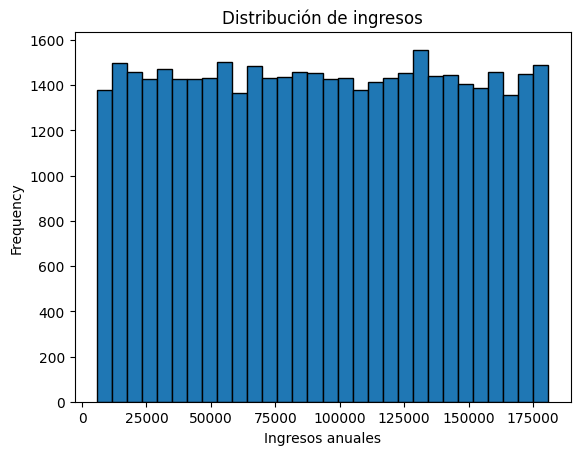

In [58]:
df_cus["Income"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribución de ingresos")
plt.xlabel("Ingresos anuales")
plt.show()

La distribución parece bastante uniforme, sin grandes picos en valores concretos. Esto sugiere que hay clientes de muchos niveles de renta

Ahora analizo cuántos niños pequeños hay en los hogares. Esto ayuda a entender la composición familiar de los clientes

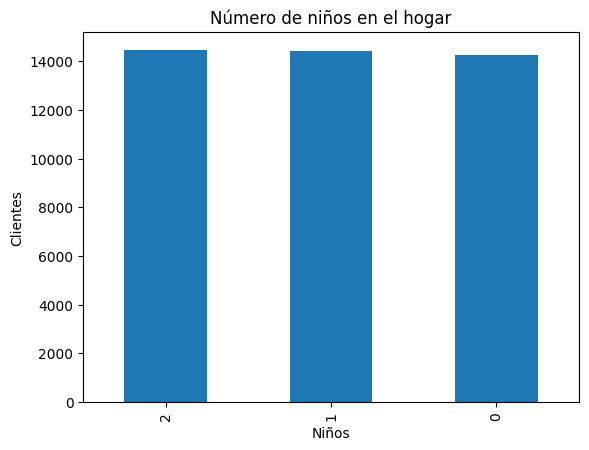

In [59]:
df_cus["Kidhome"].value_counts().plot(kind="bar")
plt.title("Número de niños en el hogar")
plt.xlabel("Niños")
plt.ylabel("Clientes")
plt.show()

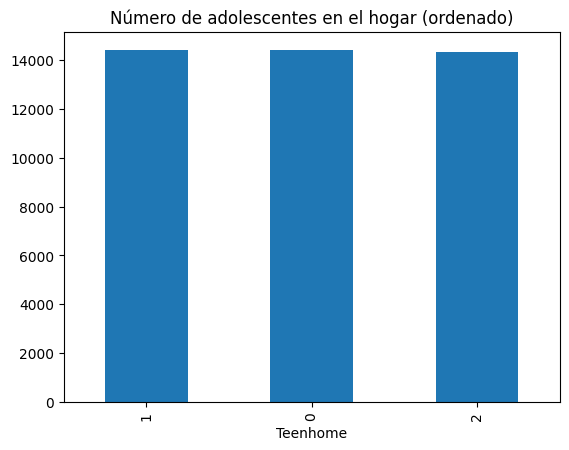

In [63]:
df_cus["Teenhome"].value_counts().sort_values(ascending=False).plot(kind="bar")
plt.title("Número de adolescentes en el hogar (ordenado)")
plt.show()

Vemos que los clientes se reparten casi de forma similar entre hogares con 0, 1 o 2 niños. No hay valores extremos, ya que el máximo es 2.
La mayoría de los hogares tienen 0 o 1 adolescente, y son menos los que tienen 2. Igual que con los niños, no hay valores fuera de rango

Analizo el número de visitas que los clientes realizan a la página web en un mes. Esto me da una idea de su comportamiento digital

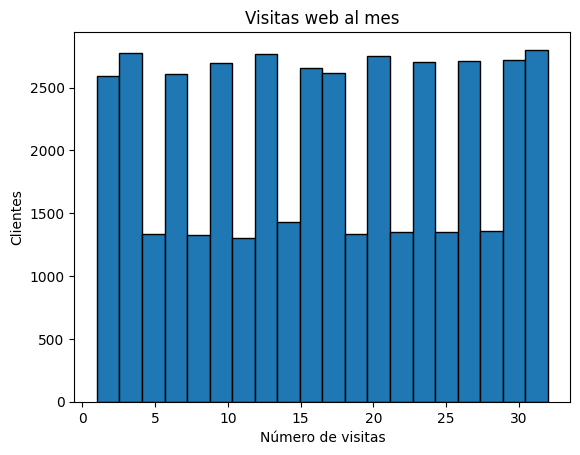

In [67]:
df_cus["NumWebVisitsMonth"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Visitas web al mes")
plt.xlabel("Número de visitas")
plt.ylabel("Clientes")
plt.show()

El número de visitas está bastante repartido, aunque se aprecian picos en ciertos valores (como 2, 4 o 10). Algunos clientes llegan a visitar la web más de 30 veces al mes, pero no son la mayoría

Analizo cada año el numero de clientes que se han tenido de alta.

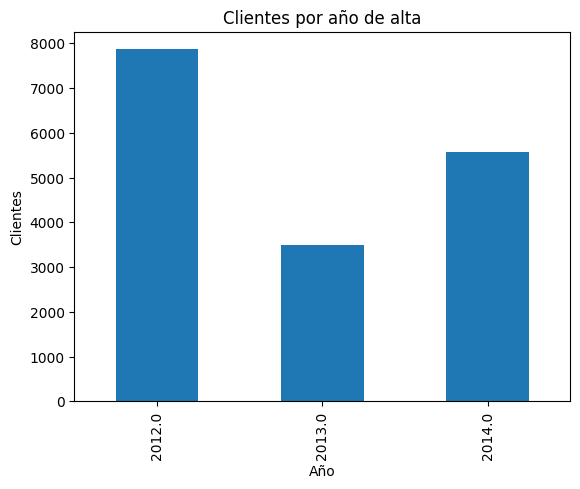

In [68]:
# Asegura tipo fecha
df_cus["Dt_Customer"] = pd.to_datetime(df_cus["Dt_Customer"], errors="coerce", dayfirst=True)

# Clientes por año (ordenados)
df_cus["Dt_Customer"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.title("Clientes por año de alta")
plt.xlabel("Año"); plt.ylabel("Clientes")
plt.show()


La mayoría de clientes entraron en 2012, luego hubo menos altas en 2013, y volvió a crecer en 2014. Esto podría estar relacionado con estrategias comerciales del banco en esos años

### Matriz de correlación

Calculo la correlación entre las variables numéricas (`Income`, `Kidhome`, `Teenhome`, `NumWebVisitsMonth`).  
Esto sirve para ver si alguna de ellas se mueve de forma parecida y aporta información similar.


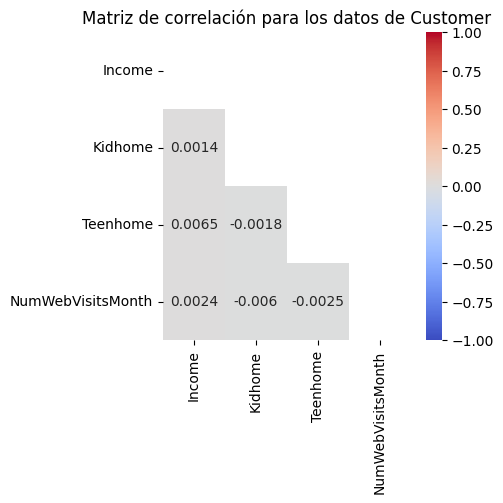

In [ ]:
corr_matrix = df_cus[["Income","Kidhome","Teenhome","NumWebVisitsMonth"]].corr()
plt.figure(figsize=(corr_matrix.shape))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # mostramos solo triángulo inferior
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap="coolwarm", 
            mask=mask, 
            vmin=-1, 
            vmax=1)
plt.title("Matriz de correlación para los datos de Customer")
plt.show()


Las correlaciones entre estas variables son muy bajas, lo que significa que cada una aporta 
información distinta: los ingresos no dependen del número de hijos, ni las visitas web del nivel de ingresos.


### Conclusión del EDA de Customers
- Los ingresos están repartidos a lo largo de todo el rango, sin una concentración fuerte en un nivel específico.  
- La mayoría de clientes tiene 0, 1 o 2 hijos en casa, no aparecen valores más altos.  
- Las visitas web al mes son muy variadas, desde 0 hasta 30, aunque no hay un patrón claro de acumulación.  
- Al comparar ingresos con visitas web, no se aprecia una relación clara: tanto clientes con ingresos bajos como altos realizan un número similar de visitas.

En resumen, la base de clientes es bastante diversa y no se detectan tendencias muy marcadas en las variables analizadas.
